In [ ]:
"""
235150200111017_Muhammad Zhafir Aufar
235150200111020_Rhesa Tsaqif Adyatma
235150201111024_Farhan Vier Syarif Hilmi
235150207111016_Ahmad Mafaza Afnani
235150207111023_Muhammad Bagas Arya Pratama
"""

# Import Library

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from random import randint
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.metrics import normalized_mutual_info_score, fowlkes_mallows_score, rand_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# Load Data

Sumber Data: [Estimation of Obesity Levels Based On Eating Habits and Physical Condition](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

In [39]:
# Membaca dataset dari URL dan menyimpannya dalam DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/KAL-Clustering/refs/heads/master/estimation%2Bof%2Bobesity%2Blevels%2Bbased%2Bon%2Beating%2Bhabits%2Band%2Bphysical%2Bcondition%20(1)/ObesityDataSet_raw_and_data_sinthetic.csv')

In [40]:
# Menampilkan 10 Data reratas
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [41]:
# Menampilkan 10 Daata Terakhir
df.tail(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2101,Female,25.722004,1.628470,107.218949,yes,yes,3.0,3.0,Sometimes,no,2.487070,no,0.067329,0.455823,Sometimes,Public_Transportation,Obesity_Type_III
2102,Female,25.765628,1.627839,108.107360,yes,yes,3.0,3.0,Sometimes,no,2.320068,no,0.045246,0.413106,Sometimes,Public_Transportation,Obesity_Type_III
2103,Female,21.016849,1.724268,133.033523,yes,yes,3.0,3.0,Sometimes,no,1.650612,no,1.537639,0.912457,Sometimes,Public_Transportation,Obesity_Type_III
2104,Female,21.682367,1.732383,133.043941,yes,yes,3.0,3.0,Sometimes,no,1.610768,no,1.510398,0.931455,Sometimes,Public_Transportation,Obesity_Type_III
2105,Female,21.285965,1.726920,131.335786,yes,yes,3.0,3.0,Sometimes,no,1.796267,no,1.728332,0.897924,Sometimes,Public_Transportation,Obesity_Type_III
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


# EDA

In [42]:
# Menghitung jumlah kemunculan masing-masing kategori pada kolom 'NObeyesdad'
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

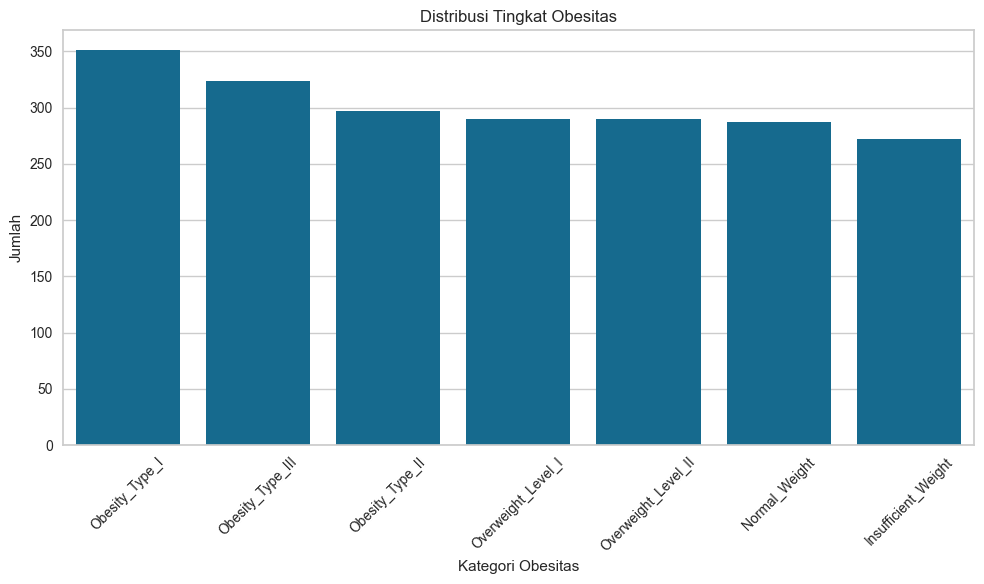

In [43]:
# Visualisasi distribusi kategori obesitas berdasarkan jumlah kemunculannya
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title("Distribusi Tingkat Obesitas")
plt.xlabel("Kategori Obesitas")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

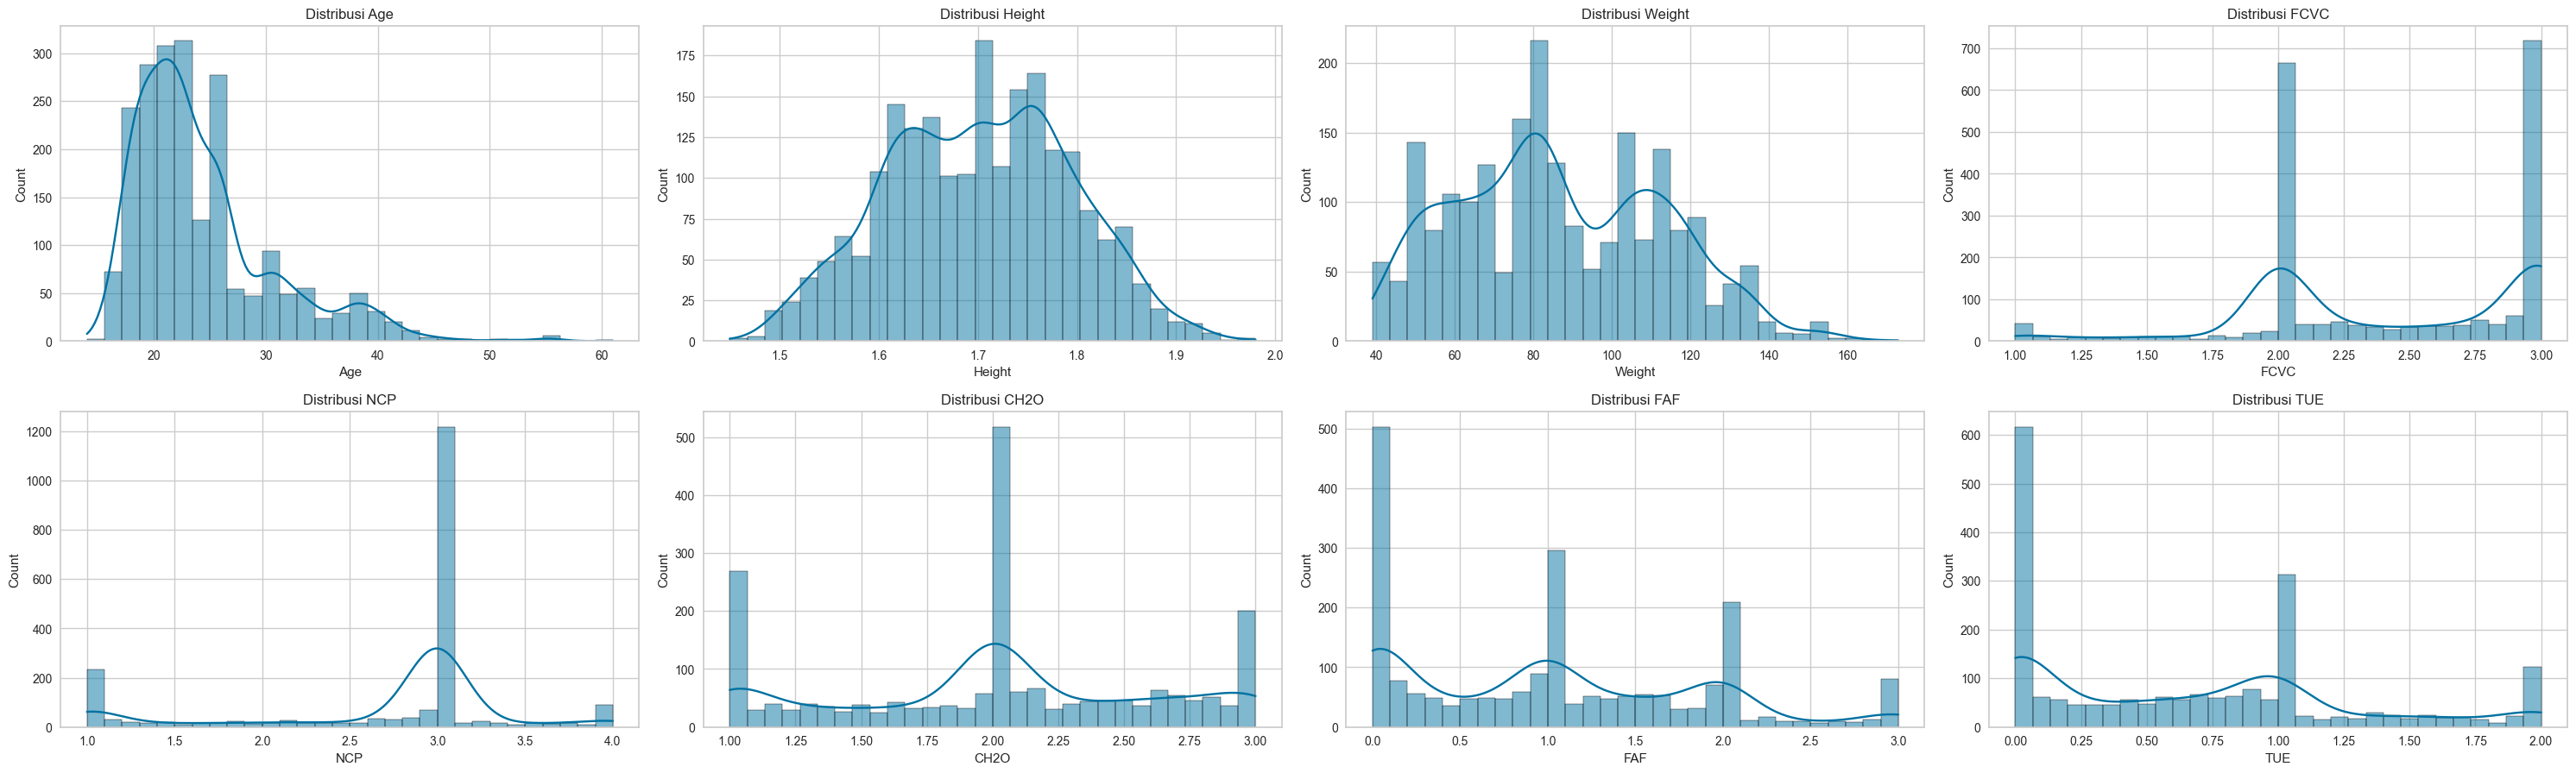

In [44]:
# Visualisasi distribusi semua fitur numerik dalam dataset menggunakan histogram
numeric_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(30,40))
for i, column in enumerate(numeric_features, 1):
  plt.subplot(9, 4, i)
  sns.histplot(df[column], bins=30, kde=True)
  plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

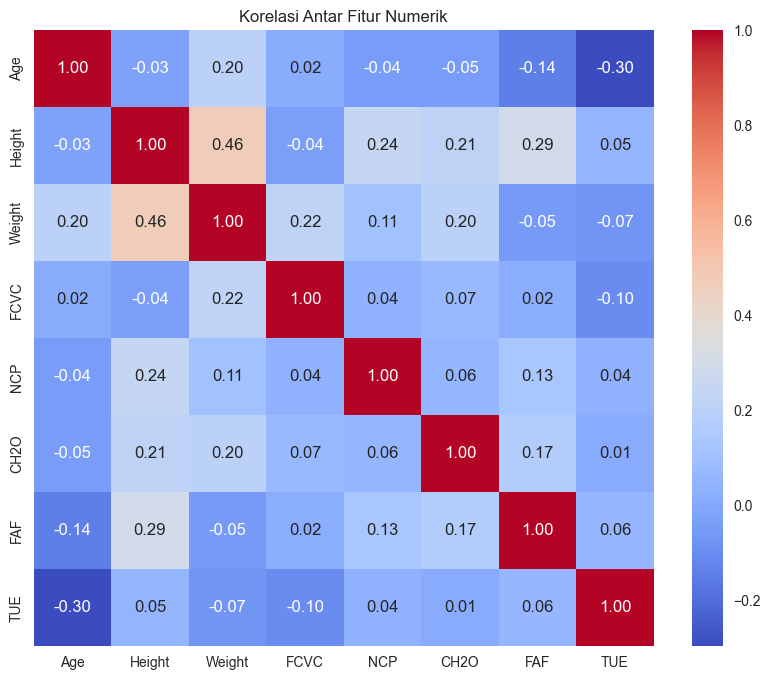

In [45]:
# Visualisasi matriks korelasi antar fitur numerik dengan heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

# Preprocessing

In [46]:
# Menampilkan informasi umum tentang DataFrame, termasuk jumlah non-null dan tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [47]:
# Mengecek dan menampilkan jumlah nilai yang hilang (missing) pada setiap kolom
missing_values = df.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [48]:
# Menampilkan jumlah baris data yang terduplikasi dalam DataFrame
print(f'Data yang Terduplikasi: {df.duplicated().sum()}')

Data yang Terduplikasi: 24


In [49]:
# Menandai dan menampilkan baris-baris yang terduplikasi dalam DataFrame
duplikat = df.duplicated()
df[duplikat]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [50]:
# Menghapus baris-baris duplikat dari DataFrame secara permanen
df.drop_duplicates(inplace=True)

In [51]:
# Mengecek ulang dan menampilkan jumlah data duplikat setelah penghapusan
print(f'Data yang Terduplikasi: {df.duplicated().sum()}')

Data yang Terduplikasi: 0


In [52]:
# Menampilkan statistik deskriptif lengkap untuk semua kolom, termasuk numerik dan kategorikal
df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2087,2087.000000,2087.000000,2087.000000,2087,2087,2087.000000,2087.000000,2087,2087,2087.000000,2087,2087.000000,2087.000000,2087,2087,2087
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1052,NaN,NaN,NaN,1722,1844,NaN,NaN,1761,2043,NaN,1991,NaN,NaN,1380,1558,351
mean,NaN,24.353090,1.702674,86.858730,NaN,NaN,2.421466,2.701179,NaN,NaN,2.004749,NaN,1.012812,0.663035,NaN,NaN,NaN
std,NaN,6.368801,0.093186,26.190847,NaN,NaN,0.534737,0.764614,NaN,NaN,0.608284,NaN,0.853475,0.608153,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.915937,1.630178,66.000000,NaN,NaN,2.000000,2.697467,NaN,NaN,1.590922,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.847618,1.701584,83.101100,NaN,NaN,2.396265,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.630866,NaN,NaN,NaN
75%,NaN,26.000000,1.769491,108.015907,NaN,NaN,3.000000,3.000000,NaN,NaN,2.466193,NaN,1.678102,1.000000,NaN,NaN,NaN


## Handling Outlier

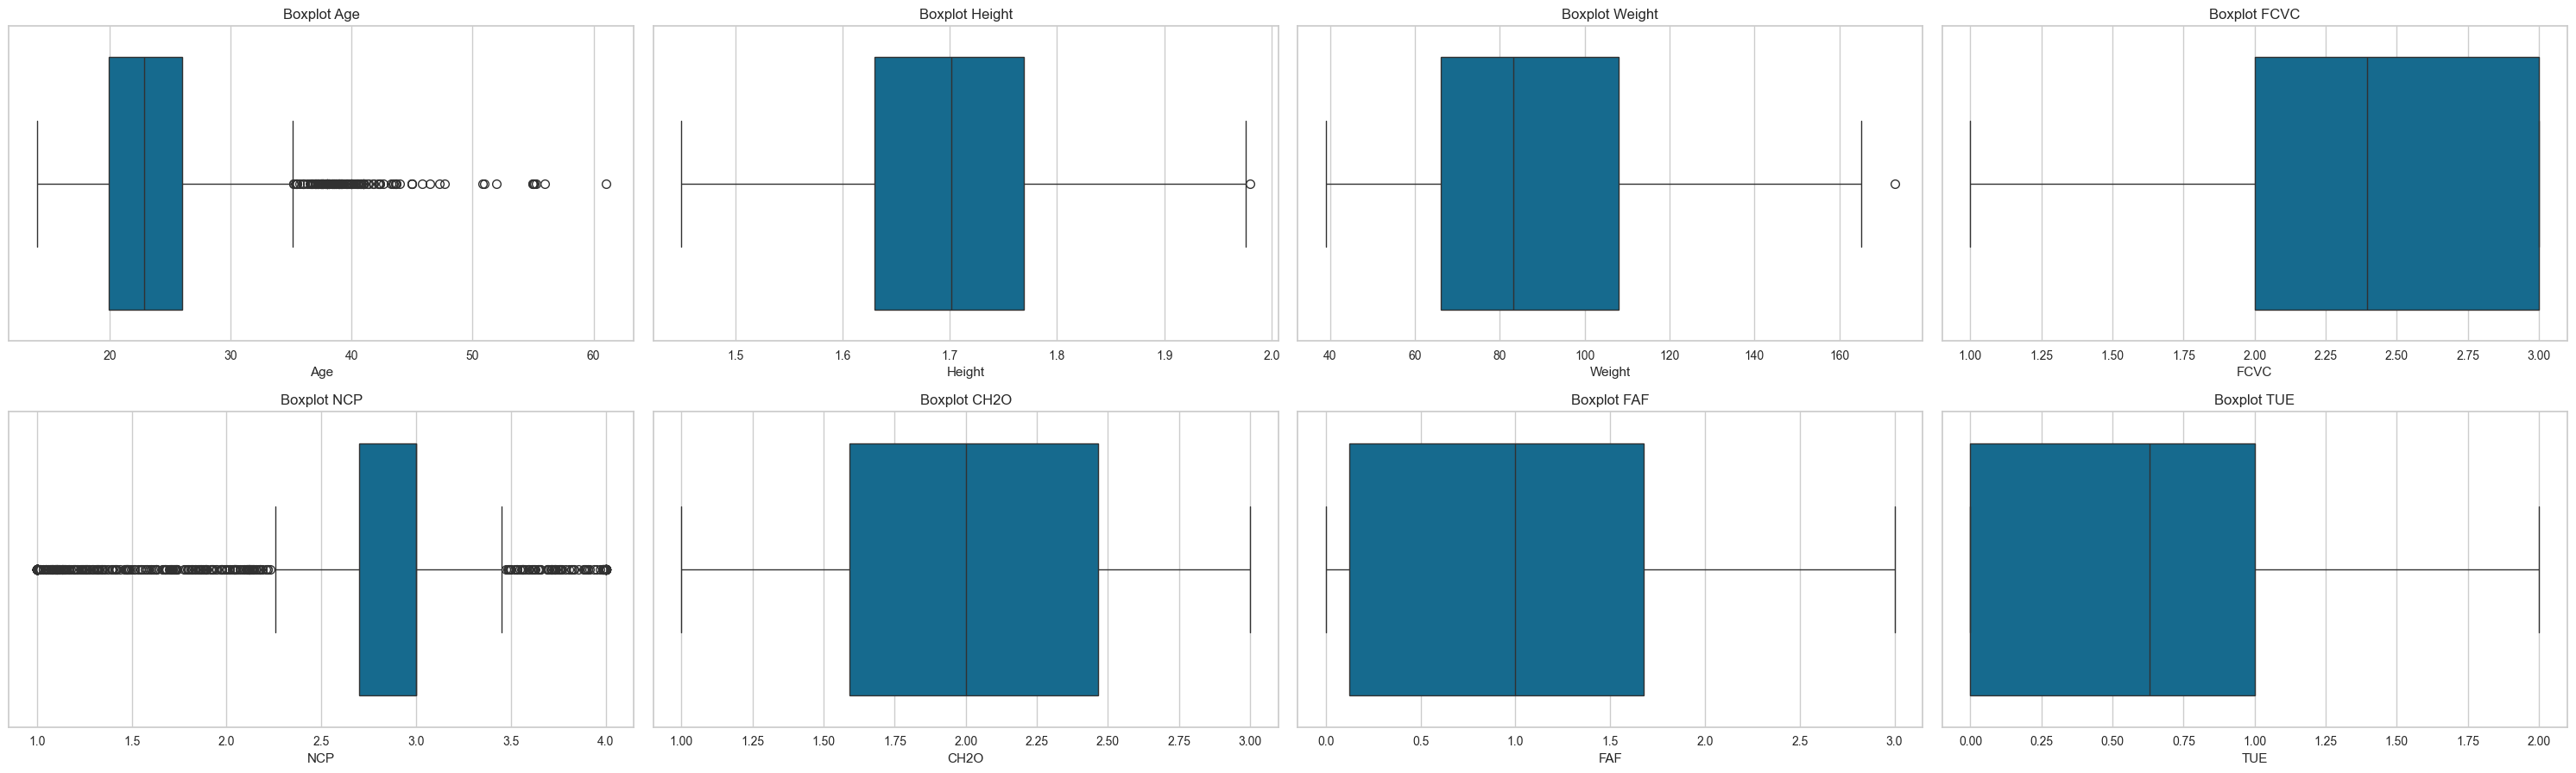

In [53]:
# Visualisasi distribusi dan outlier setiap fitur numerik menggunakan boxplot
plt.figure(figsize=(30, 40))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(9, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

## Encoding

### Label Encoding

In [54]:
# Fungsi untuk mengubah kategori frekuensi pada kolom 'CALC' menjadi nilai numerik
def encode_calc(x):
    if x == 'no':
        return 0
    elif x == 'Sometimes':
        return 1
    elif x == 'Frequently':
        return 2
    elif x == 'Always':
        return 3


# Menerapkan encoding pada kolom 'CALC'
df['CALC'] = df['CALC'].apply(encode_calc)

In [55]:
# Fungsi untuk mengubah nilai 'yes'/'no' pada kolom 'FAVC' menjadi 1 dan 0
def encode_favc(x):
    return 1 if x == 'yes' else 0

# Menerapkan encoding pada kolom 'FAVC'
df['FAVC'] = df['FAVC'].apply(encode_favc)

In [56]:
# Fungsi untuk mengubah nilai 'yes'/'no' pada kolom 'family_history_with_overweight' menjadi 1 dan 0
def encode_family_history(x):
    return 1 if x == 'yes' else 0

# Menerapkan encoding pada kolom 'family_history_with_overweight'
df['family_history_with_overweight'] = df['family_history_with_overweight'].apply(encode_family_history)

In [57]:
# Fungsi untuk mengubah nilai 'yes'/'no' pada kolom 'SCC' menjadi 0 dan 1 
def encode_scc(x):
    return 0 if x == 'yes' else 1

# Menerapkan encoding pada kolom 'SCC'
df['SCC'] = df['SCC'].apply(encode_scc)

In [58]:
# Fungsi untuk mengubah nilai 'yes'/'no' pada kolom 'SMOKE' menjadi 1 dan 0
def encode_smoke(x):
    return 1 if x == 'yes' else 0


# Menerapkan encoding pada kolom 'SMOKE'
df['SMOKE'] = df['SMOKE'].apply(encode_smoke)

### One Hot Encoding

In [59]:
# Mengonversi fitur kategorikal 'Gender', 'CAEC', dan 'MTRANS' menjadi variabel dummy (one-hot encoding)
categorical_features = ['Gender', 'CAEC', 'MTRANS']
dummies = pd.get_dummies(df[categorical_features])

# Menghapus kolom asli dan menggabungkan kolom dummy ke DataFrame utama
df = df.drop(columns=categorical_features)
df = pd.concat([df, dummies], axis=1)

In [60]:
# Menampilkan hasil data yang telah di preprocessing
df

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,Gender_Male,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,2.000000,1,...,False,False,False,True,False,False,False,False,True,False
1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,3.000000,0,...,False,False,False,True,False,False,False,False,True,False
2,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,2.000000,1,...,True,False,False,True,False,False,False,False,True,False
3,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,2.000000,1,...,True,False,False,True,False,False,False,False,False,True
4,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,2.000000,1,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,1.728139,1,...,False,False,False,True,False,False,False,False,True,False
2107,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,2.005130,1,...,False,False,False,True,False,False,False,False,True,False
2108,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,2.054193,1,...,False,False,False,True,False,False,False,False,True,False
2109,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,2.852339,1,...,False,False,False,True,False,False,False,False,True,False


#

In [61]:
# Memindahkan kolom target 'NObeyesdad' dari DataFrame dan mengubahnya menjadi kode kategori numerik
kelas = df.pop('NObeyesdad')
kelas = kelas.astype('category').cat.codes

In [62]:
# Mereset indeks DataFrame dan variabel target agar berurutan dan sinkron setelah manipulasi data
df = df.reset_index(drop=True)
kelas = kelas.reset_index(drop=True)

# Modeling dan Evaluasi Manual

## Fungsi Evaluasi

In [63]:
# Fungsi menghitung purity score sebagai metrik evaluasi kualitas clustering
def purity_score(y_true, y_pred):
    labels_true = np.unique(y_true)
    labels_pred = np.unique(y_pred)

    label_to_index_true = {label: idx for idx, label in enumerate(labels_true)}
    label_to_index_pred = {label: idx for idx, label in enumerate(labels_pred)}

    contingency_matrix = np.zeros((len(labels_pred), len(labels_true)))
    for i in range(len(y_true)):
        row = label_to_index_pred[y_pred[i]]
        col = label_to_index_true[y_true[i]]
        contingency_matrix[row][col] += 1

    return np.sum(np.amax(contingency_matrix, axis=1)) / np.sum(contingency_matrix)

# Fungsi menghitung Within-Cluster Sum of Squares (WCSS) secara manual untuk evaluasi clustering
def manual_wcss(X, labels):
    wcss = 0
    X_np = X.to_numpy() if hasattr(X, "to_numpy") else X
    for label in np.unique(labels):
        cluster_points = X_np[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

## KMeans

### Modeling Kmeans

In [64]:
# Fungsi menghitung jarak Euclidean antara dua titik data 
def euclidean(data1, data2):
  jarak = np.square(data1 - data2)
  jarak = np.sum(jarak)
  return np.sqrt(jarak)

In [65]:
# Fungsi Implementasi algoritma K-Means untuk mengelompokkan data menjadi k cluster
def kmeans(df_input, k, iter_max=200):
    n_data = df_input.shape[0]
    n_fitur = df_input.shape[1]
    iterasi = 1

    # Inisialisasi cluster secara acak untuk tiap data
    cluster = np.array([randint(0, k - 1) for _ in range(n_data)])

    centroid = np.zeros((k, n_fitur))

    cluster_tidak_berubah = False

    # Iterasi hingga cluster tidak berubah atau mencapai iterasi maksimum
    while not cluster_tidak_berubah and iterasi < iter_max:
        jarak = np.zeros((n_data, k))
        
        # Iterasi hingga cluster tidak berubah atau mencapai iterasi maksimum
        for i in range(k):
            anggota_cluster = df_input.iloc[np.where(cluster == i)[0]]
            if not anggota_cluster.empty:
                centroid[i, :] = anggota_cluster.mean().values

        # Menghitung jarak tiap data ke centroid semua cluster
        for i in range(n_data):
            for j in range(k):
                jarak[i][j] = euclidean(df_input.iloc[i].values, centroid[j])

        # Menentukan cluster baru berdasarkan jarak minimum
        cluster_baru = np.argmin(jarak, axis=1)
        
        # Cek apakah cluster sudah stabil/tidak berubah
        cluster_tidak_berubah = np.array_equal(cluster_baru, cluster)
        cluster = np.array(copy.deepcopy(cluster_baru))
        iterasi += 1

    return cluster, centroid, jarak

In [66]:
# Menjalankan algoritma K-Means pada data dengan 4 cluster
cluster_kmeans = kmeans(df, 4)

In [67]:
# Menampilkan hasil output dari fungsi kmeans, berupa cluster, centroid, dan jarak
print(cluster_kmeans)

(array([3, 3, 0, ..., 1, 1, 1]), array([[2.23257593e+01, 1.71879614e+00, 8.51524024e+01, 9.24731183e-01,
        8.88888889e-01, 2.24208580e+00, 2.54143130e+00, 1.61290323e-02,
        2.04912219e+00, 9.76702509e-01, 1.14792366e+00, 7.76270333e-01,
        6.64874552e-01, 3.01075269e-01, 6.98924731e-01, 2.50896057e-02,
        6.45161290e-02, 9.06810036e-01, 3.58422939e-03, 1.20071685e-01,
        3.58422939e-03, 5.37634409e-03, 8.38709677e-01, 3.22580645e-02],
       [2.54525728e+01, 1.74415945e+00, 1.17290364e+02, 9.97146933e-01,
        9.85734665e-01, 2.63699388e+00, 2.86041363e+00, 2.42510699e-02,
        2.12880598e+00, 9.97146933e-01, 8.55689220e-01, 5.80955892e-01,
        9.01569187e-01, 4.60770328e-01, 5.39229672e-01, 5.70613409e-03,
        4.27960057e-03, 9.87161198e-01, 2.85306705e-03, 1.66904422e-01,
        1.42653352e-03, 1.42653352e-03, 8.27389444e-01, 2.85306705e-03],
       [3.70138504e+01, 1.66369533e+00, 7.91696138e+01, 8.87850467e-01,
        8.73831776e-01, 2.358

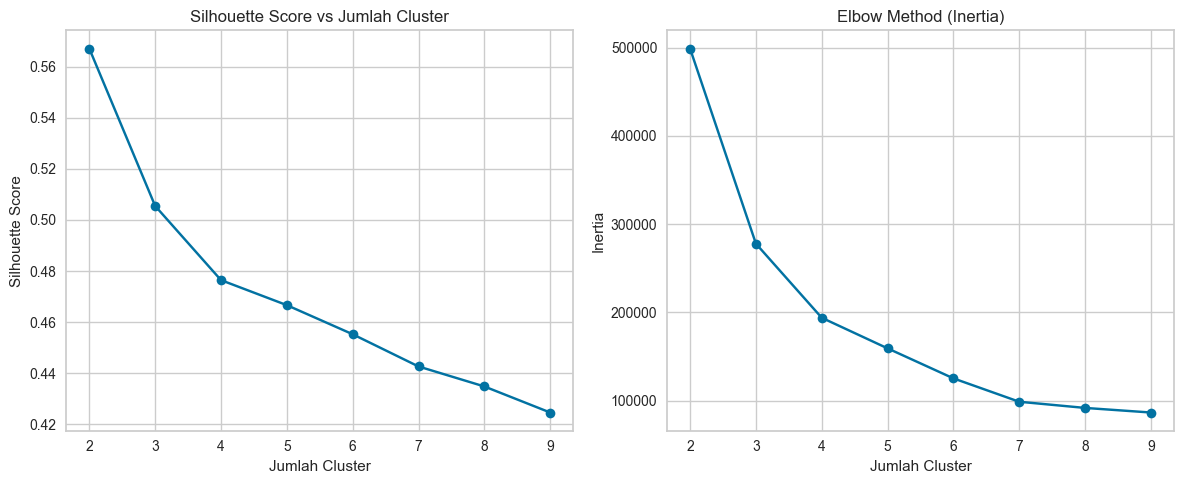

In [68]:
# Evaluasi performa clustering K-Means untuk berbagai jumlah cluster menggunakan Silhouette Score dan Inertia,
# kemudian menampilkan grafik Silhouette Score dan Elbow Method untuk membantu pemilihan jumlah cluster optimal

sil_scores = []
inertias = []
cluster_range = range(2, 10)

for k in cluster_range:
    cluster_labels, centroids, jarak = kmeans(df, k)

    inertia = 0
    for i in range(df.shape[0]):
        inertia += euclidean(df.iloc[i].values, centroids[cluster_labels[i]])**2

    inertias.append(inertia)

    if len(set(cluster_labels)) > 1:
        sil_scores.append(silhouette_score(df, cluster_labels))
    else:
        sil_scores.append(-1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, sil_scores, marker='o')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

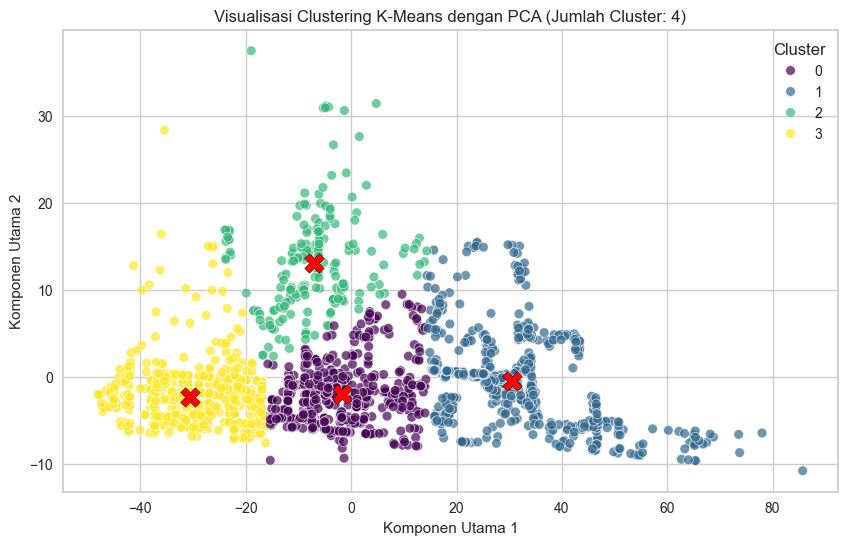

In [69]:
# Mengurangi dimensi data menjadi 2 komponen utama menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

# Membuat DataFrame hasil reduksi dan menambahkan label cluster hasil K-Means
reduced_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
reduced_df['cluster'] = cluster_kmeans[0]

# Visualisasi scatter plot hasil clustering pada ruang 2D PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='cluster',
    palette='viridis', data=reduced_df, alpha=0.7
)


# Menandai centroid setiap cluster dengan tanda 'X' merah
for cluster_id in set(cluster_kmeans[0]):
    cluster_data = reduced_df[reduced_df['cluster'] == cluster_id]
    centroid = cluster_data[['PCA1', 'PCA2']].mean()
    plt.scatter(
        centroid['PCA1'], centroid['PCA2'],
        color='red', s=200, marker='X', edgecolor='black'
    )

plt.title(f'Visualisasi Clustering K-Means dengan PCA (Jumlah Cluster: {len(set(cluster_kmeans[0]))})')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Evaluasi Internal KMeans

In [70]:
# Menghitung dan menampilkan Silhouette Score untuk mengukur seberapa baik cluster terbentuk
sil_score = silhouette_score(df, cluster_kmeans[0])
print(f"Silhouette Score: {sil_score:.4f}")

# Menghitung dan menampilkan Davies-Bouldin Index yang mengukur rata-rata similarity antar cluster (semakin kecil semakin baik)
dbi = davies_bouldin_score(df, cluster_kmeans[0])
print(f"Davies-Bouldin Index: {dbi:.2f}")

# Menghitung dan menampilkan Calinski-Harabasz Index, yang mengukur rasio antara dispersion antar cluster dan dalam cluster (semakin besar semakin baik)
ch_index = calinski_harabasz_score(df, cluster_kmeans[0])
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

# Menghitung dan menampilkan Within-Cluster Sum of Squares (WCSS) sebagai ukuran total variasi dalam cluster (semakin kecil semakin baik)
wcss = manual_wcss(df, cluster_kmeans[0])
print(f"WCSS: {wcss:.2f}")

Silhouette Score: 0.4763
Davies-Bouldin Index: 0.79
Calinski-Harabasz Index: 3682.65
WCSS: 241767.56


### Evaluasi Eksternal KMeans

In [71]:
# Menghitung Purity untuk mengukur kesesuaian cluster dengan kelas asli (semakin mendekati 1 semakin baik)
purity = purity_score(kelas, cluster_kmeans[0])
print(f'Purity Kmeans: {purity}')

# Menghitung Rand Index, metrik untuk mengukur kesamaan antara hasil clustering dan label asli (nilai 0-1, semakin dekat 1 semakin baik)
ri = rand_score(kelas, cluster_kmeans[0])
print(f'Rand Index Kmeans: {ri}')

# Menghitung Adjusted Rand Index (ARI) yang memperbaiki Rand Index dengan memperhitungkan kemungkinan kebetulan (nilai -1 sampai 1, semakin tinggi semakin baik)
ari = adjusted_rand_score(kelas, cluster_kmeans[0])
print(f'Adjusted Rand Index Kmeans: {ari}')

# Menghitung Normalized Mutual Information (NMI), ukuran ketergantungan informasi antara cluster dan kelas asli (0-1, semakin tinggi semakin baik)
nmi = normalized_mutual_info_score(kelas, cluster_kmeans[0])
print(f'Normalized Mutual Informatiion Kmeans: {nmi}')

# Menghitung Fowlkes-Mallows Index, mengukur kesamaan antara cluster dan label asli (0-1, semakin tinggi semakin baik)
fm = fowlkes_mallows_score(kelas, cluster_kmeans[0])
print(f'Fowlkes-Mallows Index Kmeans: {fm}')

Purity Kmeans: 0.40967896502156204
Rand Index Kmeans: 0.7675318285455183
Adjusted Rand Index Kmeans: 0.3241082640068763
Normalized Mutual Informatiion Kmeans: 0.46378212160782584
Fowlkes-Mallows Index Kmeans: 0.4783287329883175


## Agglomerative

### Hierarchial dengan Single Linkage

In [72]:
# Menghitung linkage hierarchical clustering dengan metode single linkage menggunakan metrik jarak cityblock (Manhattan)
linked_single = linkage(df, method='single', metric='cityblock')

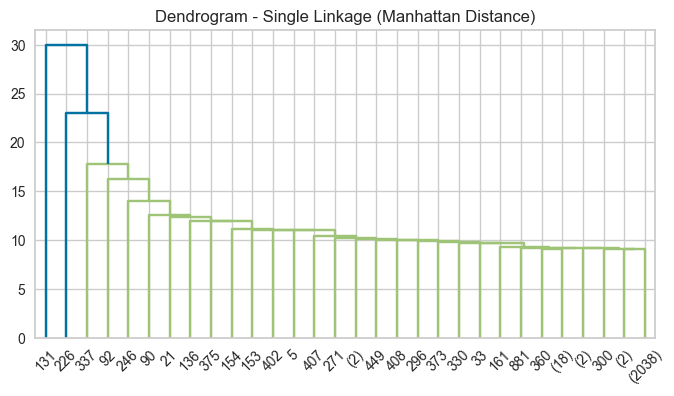

In [73]:
# Membuat dendrogram untuk hasil hierarchical clustering dengan metode single linkage dan jarak Manhattan,
# menampilkan 30 cluster terakhir untuk visualisasi yang lebih ringkas
plt.figure(figsize=(8, 4))
dendrogram(linked_single, labels=df.index, orientation='top', truncate_mode='lastp', p=30)
plt.title('Dendrogram - Single Linkage (Manhattan Distance)')
plt.show()

In [74]:
# Membentuk cluster dengan memotong dendrogram menjadi 2 cluster menggunakan metode single linkage
cluster_labels_single = fcluster(linked_single, 2, criterion='maxclust')

# Menyalin DataFrame asli dan menambahkan kolom label cluster hasil single linkage
df_cluster_single = df.copy()
df_cluster_single['cluster_single'] = cluster_labels_single

# Menampilkan DataFrame dengan kolom cluster
print(df_cluster_single)

            Age    Height      Weight  family_history_with_overweight  FAVC  \
0     21.000000  1.620000   64.000000                               1     0   
1     21.000000  1.520000   56.000000                               1     0   
2     23.000000  1.800000   77.000000                               1     0   
3     27.000000  1.800000   87.000000                               0     0   
4     22.000000  1.780000   89.800000                               0     0   
...         ...       ...         ...                             ...   ...   
2082  20.976842  1.710730  131.408528                               1     1   
2083  21.982942  1.748584  133.742943                               1     1   
2084  22.524036  1.752206  133.689352                               1     1   
2085  24.361936  1.739450  133.346641                               1     1   
2086  23.664709  1.738836  133.472641                               1     1   

      FCVC  NCP  SMOKE      CH2O  SCC  ...  CAEC_Al

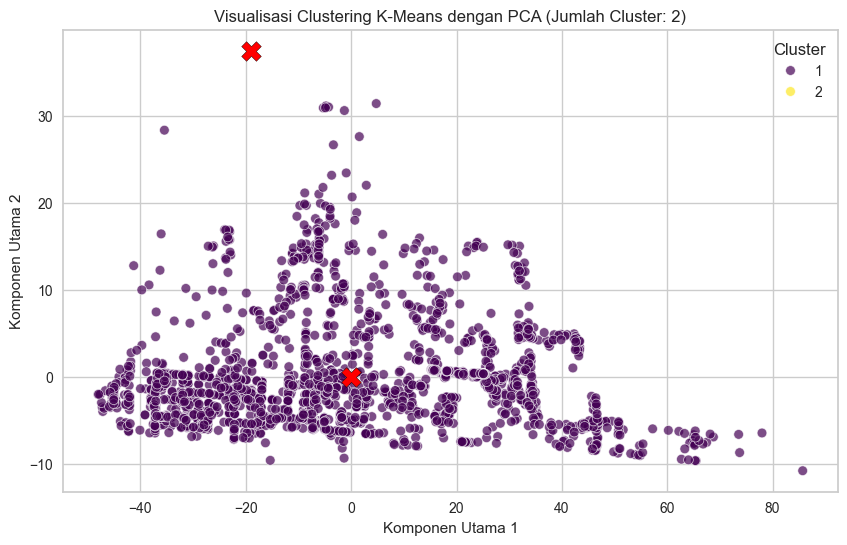

In [75]:
# Melakukan reduksi dimensi data ke 2 komponen utama menggunakan PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

# Membuat DataFrame baru untuk visualisasi hasil PCA dan menambahkan label cluster dari single linkage
reduced_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
reduced_df['cluster'] = cluster_labels_single

# Membuat scatter plot hasil PCA dengan warna berbeda berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='cluster',
    palette='viridis', data=reduced_df, alpha=0.7
)

# Menandai centroid setiap cluster pada plot dengan marker khusus
for cluster_id in set(cluster_labels_single):
    cluster_data = reduced_df[reduced_df['cluster'] == cluster_id]
    centroid = cluster_data[['PCA1', 'PCA2']].mean()
    plt.scatter(
        centroid['PCA1'], centroid['PCA2'],
        color='red', s=200, marker='X', edgecolor='black'
    )

plt.title(f'Visualisasi Clustering K-Means dengan PCA (Jumlah Cluster: {len(set(cluster_labels_single))})')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Evaluasi

Evaluasi Internal Hierarchial menggunakan single linkage

In [76]:
# Menghitung dan menampilkan Silhouette Score untuk mengukur seberapa baik cluster terbentuk
score = silhouette_score(df, cluster_labels_single, metric='manhattan')
print(f"Silhouette Score (Single Linkage, Cityblock): {score:.4f}")

# Menghitung dan menampilkan Davies-Bouldin Index yang mengukur rata-rata similarity antar cluster (semakin kecil semakin baik)
dbi = davies_bouldin_score(df, cluster_labels_single)
print(f"Davies-Bouldin Index: {dbi:.2f}")

# Menghitung dan menampilkan Calinski-Harabasz Index, yang mengukur rasio antara dispersion antar cluster dan dalam cluster (semakin besar semakin baik)
ch_index = calinski_harabasz_score(df, cluster_labels_single)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score (Single Linkage, Cityblock): 0.3592
Davies-Bouldin Index: 0.56
Calinski-Harabasz Index: 2.44


Evaluasi Eksternal Hierarchial menggunakan single linkage

In [77]:
# Menghitung Purity untuk mengukur kesesuaian cluster dengan kelas asli (semakin mendekati 1 semakin baik)
purity = purity_score(kelas, cluster_labels_single)
print(f'Purity Hierarchical single linkage: {purity:.4}')

# Menghitung Rand Index, metrik untuk mengukur kesamaan antara hasil clustering dan label asli (nilai 0-1, semakin dekat 1 semakin baik)
ri = rand_score(kelas, cluster_labels_single)
print(f'Rand Index Hierarchical single linkage: {ri:.4}')

# Menghitung Adjusted Rand Index (ARI) yang memperbaiki Rand Index dengan memperhitungkan kemungkinan kebetulan (nilai -1 sampai 1, semakin tinggi semakin baik)
ari = adjusted_rand_score(kelas, cluster_labels_single)
print(f'Adjusted Rand Index Hierarchical single linkage: {ari:.4}')

# Menghitung Normalized Mutual Information (NMI), ukuran ketergantungan informasi antara cluster dan kelas asli (0-1, semakin tinggi semakin baik)
nmi = normalized_mutual_info_score(kelas, cluster_labels_single)
print(f'Normalized Mutual Informatiion Hierarchical single linkage: {nmi:.4}')

# Menghitung Fowlkes-Mallows Index, mengukur kesamaan antara cluster dan label asli (0-1, semakin tinggi semakin baik)
fm = fowlkes_mallows_score(kelas, cluster_labels_single)
print(f'Fowlkes-Mallows Index Hierarchical single linkage: {fm:.4}')

Purity Hierarchical single linkage: 0.1687
Rand Index Hierarchical single linkage: 0.1444
Adjusted Rand Index Hierarchical single linkage: 2.004e-05
Normalized Mutual Informatiion Hierarchical single linkage: 0.0009865
Fowlkes-Mallows Index Hierarchical single linkage: 0.3789


### Hierarchial dengan complete Linkage

In [78]:
# Melakukan hierarchical clustering dengan metode complete linkage menggunakan jarak Euclidean
linked_complete = linkage(df, method='complete', metric='euclidean')

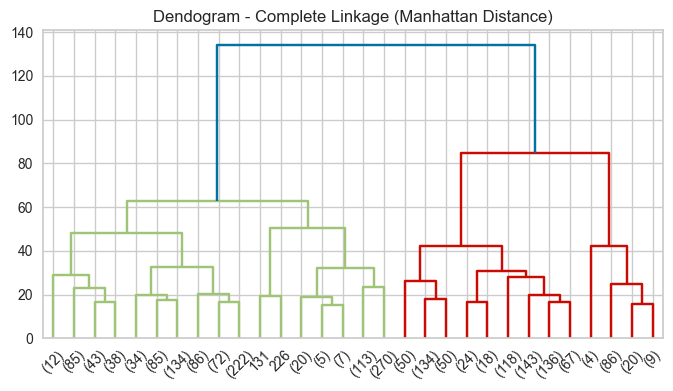

In [79]:
# Visualisasi dendrogram hasil hierarchical clustering dengan metode complete linkage
plt.figure(figsize=(8, 4))
dendrogram(linked_complete, labels=df.index, orientation='top', truncate_mode='lastp', p=30)
plt.title('Dendogram - Complete Linkage (Manhattan Distance)')
plt.show()

In [80]:
# Membuat label cluster dari hasil hierarchical clustering complete linkage dengan jumlah cluster 4
cluster_labels_complete = fcluster(linked_complete, 4, criterion='maxclust')

# Menambahkan kolom cluster hasil clustering ke dataframe salinan
df_cluster_complete = df.copy()
df_cluster_complete['cluster_complete'] = cluster_labels_complete

# Menampilkan dataframe dengan label cluster
print(df_cluster_complete)

            Age    Height      Weight  family_history_with_overweight  FAVC  \
0     21.000000  1.620000   64.000000                               1     0   
1     21.000000  1.520000   56.000000                               1     0   
2     23.000000  1.800000   77.000000                               1     0   
3     27.000000  1.800000   87.000000                               0     0   
4     22.000000  1.780000   89.800000                               0     0   
...         ...       ...         ...                             ...   ...   
2082  20.976842  1.710730  131.408528                               1     1   
2083  21.982942  1.748584  133.742943                               1     1   
2084  22.524036  1.752206  133.689352                               1     1   
2085  24.361936  1.739450  133.346641                               1     1   
2086  23.664709  1.738836  133.472641                               1     1   

      FCVC  NCP  SMOKE      CH2O  SCC  ...  CAEC_Al

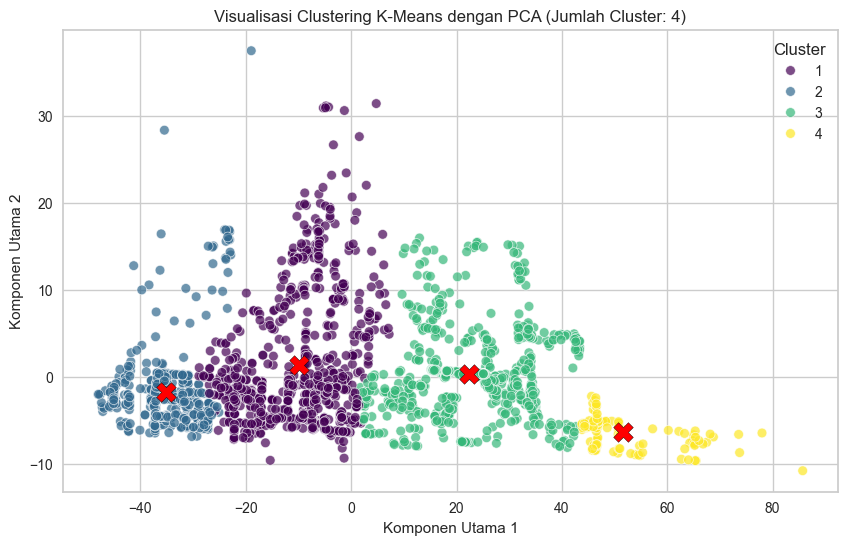

In [81]:
# Reduksi dimensi data ke 2 komponen utama menggunakan PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

# Membuat dataframe hasil PCA dan menambahkan label cluster dari hierarchical clustering complete linkage
reduced_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
reduced_df['cluster'] = cluster_labels_complete

# Visualisasi scatter plot hasil PCA dengan warna berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='cluster',
    palette='viridis', data=reduced_df, alpha=0.7
)

# Visualisasi scatter plot hasil PCA dengan warna berdasarkan cluster
for cluster_id in set(cluster_labels_complete):
    cluster_data = reduced_df[reduced_df['cluster'] == cluster_id]
    centroid = cluster_data[['PCA1', 'PCA2']].mean()
    plt.scatter(
        centroid['PCA1'], centroid['PCA2'],
        color='red', s=200, marker='X', edgecolor='black'
    )

plt.title(f'Visualisasi Clustering K-Means dengan PCA (Jumlah Cluster: {len(set(cluster_labels_complete))})')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Evaluasi

Evaluasi Internal Hierarchial menggunakan complete linkage

In [82]:
# Menghitung dan menampilkan Silhouette Score untuk mengukur seberapa baik cluster terbentuk
score = silhouette_score(df, cluster_labels_complete, metric='euclidean')
print(f"Silhouette Score (complete Linkage, Cityblock): {score:.4f}")

# Menghitung dan menampilkan Davies-Bouldin Index yang mengukur rata-rata similarity antar cluster (semakin kecil semakin baik)
dbi = davies_bouldin_score(df, cluster_labels_complete)
print(f"Davies-Bouldin Index: {dbi:.2f}")

# Menghitung dan menampilkan Calinski-Harabasz Index, yang mengukur rasio antara dispersion antar cluster dan dalam cluster (semakin besar semakin baik)
ch_index = calinski_harabasz_score(df, cluster_labels_complete)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score (complete Linkage, Cityblock): 0.4449
Davies-Bouldin Index: 0.63
Calinski-Harabasz Index: 3845.35


Evaluasi Eksternal Hierarchial menggunakan complete linkage

In [83]:
# Menghitung Purity untuk mengukur kesesuaian cluster dengan kelas asli (semakin mendekati 1 semakin baik)
purity = purity_score(kelas, cluster_labels_complete)
purity = purity_score(kelas, cluster_labels_complete)
print(f'Purity Hierarchical complete linkage: {purity:.4}')

# Menghitung Rand Index, metrik untuk mengukur kesamaan antara hasil clustering dan label asli (nilai 0-1, semakin dekat 1 semakin baik)
ri = rand_score(kelas, cluster_labels_complete)
print(f'Rand Index Hierarchical complete linkage: {ri:.4}')

# Menghitung Adjusted Rand Index (ARI) yang memperbaiki Rand Index dengan memperhitungkan kemungkinan kebetulan (nilai -1 sampai 1, semakin tinggi semakin baik)
ari = adjusted_rand_score(kelas, cluster_labels_complete)
print(f'Adjusted Rand Index Hierarchical complete linkage: {ari:.4}')

# Menghitung Normalized Mutual Information (NMI), ukuran ketergantungan informasi antara cluster dan kelas asli (0-1, semakin tinggi semakin baik)
nmi = normalized_mutual_info_score(kelas, cluster_labels_complete)
print(f'Normalized Mutual Informatiion Hierarchical complete linkage: {nmi:.4}')

# Menghitung Fowlkes-Mallows Index, mengukur kesamaan antara cluster dan label asli (0-1, semakin tinggi semakin baik)
fm = fowlkes_mallows_score(kelas, cluster_labels_complete)
print(f'Fowlkes-Mallows Index Hierarchical complete linkage: {fm:.4}')

Purity Hierarchical complete linkage: 0.4427
Rand Index Hierarchical complete linkage: 0.7357
Adjusted Rand Index Hierarchical complete linkage: 0.2884
Normalized Mutual Informatiion Hierarchical complete linkage: 0.489
Fowlkes-Mallows Index Hierarchical complete linkage: 0.4642


# Modeling dan Evaluasi Menggunakan Library

## KMeans

### Modeling

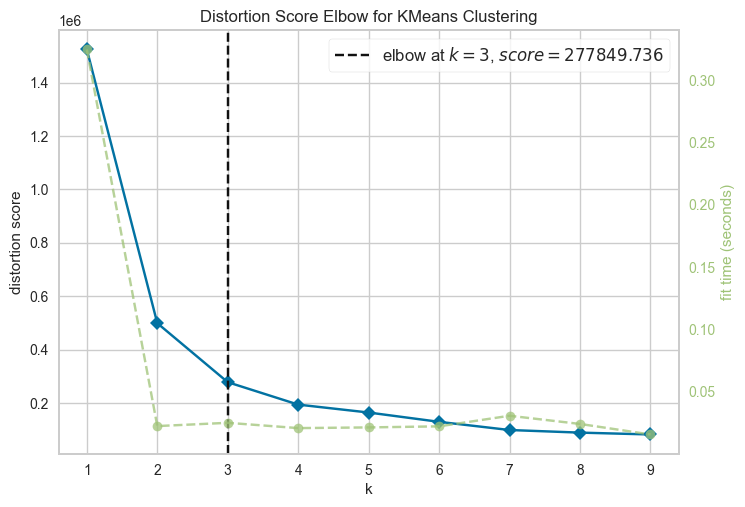

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
# Visualisasi Elbow Method untuk menentukan jumlah cluster optimal pada KMeans
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df)
visualizer.show()

In [85]:
# Melakukan clustering dengan KMeans menggunakan k=3 cluster
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(df)
labels_kmeans = kmeans.labels_

In [86]:
# Menghitung dan menampilkan silhouette score untuk berbagai jumlah cluster KMeans
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(df)

    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(df, cluster_labels)
    print("n_clusters={0}, silhouette score {1}".format(num_clusters, silhouette_avg))

n_clusters=2, silhouette score 0.5670932845011014
n_clusters=3, silhouette score 0.5054897308178193
n_clusters=4, silhouette score 0.47645339654333674
n_clusters=5, silhouette score 0.4673751730694632
n_clusters=6, silhouette score 0.4550636707234988
n_clusters=7, silhouette score 0.4427028251769856
n_clusters=8, silhouette score 0.44411930655559967


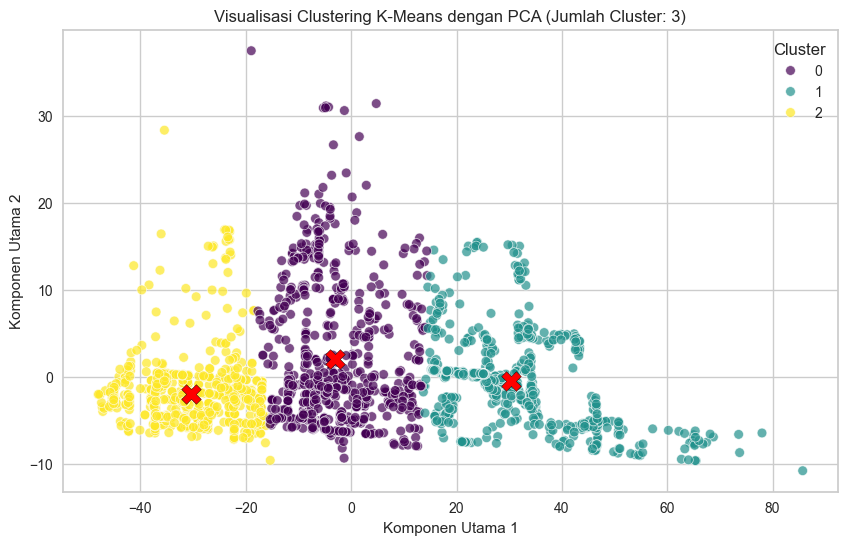

In [87]:
# Reduksi dimensi ke 2 komponen utama menggunakan PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

# Membuat DataFrame dari data hasil reduksi dengan kolom cluster
reduced_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
reduced_df['cluster'] = labels_kmeans

# Plot scatter dengan warna beda berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='cluster',
    palette='viridis', data=reduced_df, alpha=0.7
)


# Menandai centroid tiap cluster dengan marker besar merah
for cluster_id in set(labels_kmeans):
    cluster_data = reduced_df[reduced_df['cluster'] == cluster_id]
    centroid = cluster_data[['PCA1', 'PCA2']].mean()
    plt.scatter(
        centroid['PCA1'], centroid['PCA2'],
        color='red', s=200, marker='X', edgecolor='black'
    )

plt.title(f'Visualisasi Clustering K-Means dengan PCA (Jumlah Cluster: {len(set(labels_kmeans))})')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Evaluasi

Evalasi Internal Kmeans

In [88]:
# Menghitung dan menampilkan Silhouette Score untuk mengukur seberapa baik cluster terbentuk
sil_score = silhouette_score(df, labels_kmeans)
print(f'Silhouette Score: {sil_score:.2f}')

# Menghitung dan menampilkan Davies-Bouldin Index yang mengukur rata-rata similarity antar cluster (semakin kecil semakin baik)
dbi = davies_bouldin_score(df, labels_kmeans)
print(f"Davies-Bouldin Index (K-Means): {dbi:.2f}")

# Menghitung dan menampilkan Calinski-Harabasz Index, yang mengukur rasio antara dispersion antar cluster dan dalam cluster (semakin besar semakin baik)
ch_index = calinski_harabasz_score(df, labels_kmeans)
print(f"Calinski-Harabasz Index (K-Means): {ch_index:.2f}")

# Menghitung dan menampilkan Within-Cluster Sum of Squares (WCSS) sebagai ukuran total variasi dalam cluster (semakin kecil semakin baik)
wcss = kmeans.inertia_
print(f"WCSS (K-Means): {wcss:.2f}")

Silhouette Score: 0.51
Davies-Bouldin Index (K-Means): 0.66
Calinski-Harabasz Index (K-Means): 4673.61
WCSS (K-Means): 88950.51


Evaluasi Eksternal Kmeans

In [89]:
# Menghitung Purity untuk mengukur kesesuaian cluster dengan kelas asli (semakin mendekati 1 semakin baik)
purity = purity_score(kelas, labels_kmeans)
print(f'Purity kmeans: {purity:.4}')

# Menghitung Rand Index, metrik untuk mengukur kesamaan antara hasil clustering dan label asli (nilai 0-1, semakin dekat 1 semakin baik)
ri = rand_score(kelas, labels_kmeans)
print(f'Rand Index kmeans: {ri:.4}')

# Menghitung Adjusted Rand Index (ARI) yang memperbaiki Rand Index dengan memperhitungkan kemungkinan kebetulan (nilai -1 sampai 1, semakin tinggi semakin baik)
ari = adjusted_rand_score(kelas, labels_kmeans)
print(f'Adjusted Rand Index kmeans: {ari:.4}')

# Menghitung Normalized Mutual Information (NMI), ukuran ketergantungan informasi antara cluster dan kelas asli (0-1, semakin tinggi semakin baik)
nmi = normalized_mutual_info_score(kelas, labels_kmeans)
print(f'Normalized Mutual Informatiion kmeans: {nmi:.4}')

# Menghitung Fowlkes-Mallows Index, mengukur kesamaan antara cluster dan label asli (0-1, semakin tinggi semakin baik)
fm = fowlkes_mallows_score(kelas, labels_kmeans)
print(f'Fowlkes-Mallows Index kmeans: {fm:.4}')

Purity kmeans: 0.4058
Rand Index kmeans: 0.7463
Adjusted Rand Index kmeans: 0.3363
Normalized Mutual Informatiion kmeans: 0.4993
Fowlkes-Mallows Index kmeans: 0.5123


## Agglomerative

### Modeling

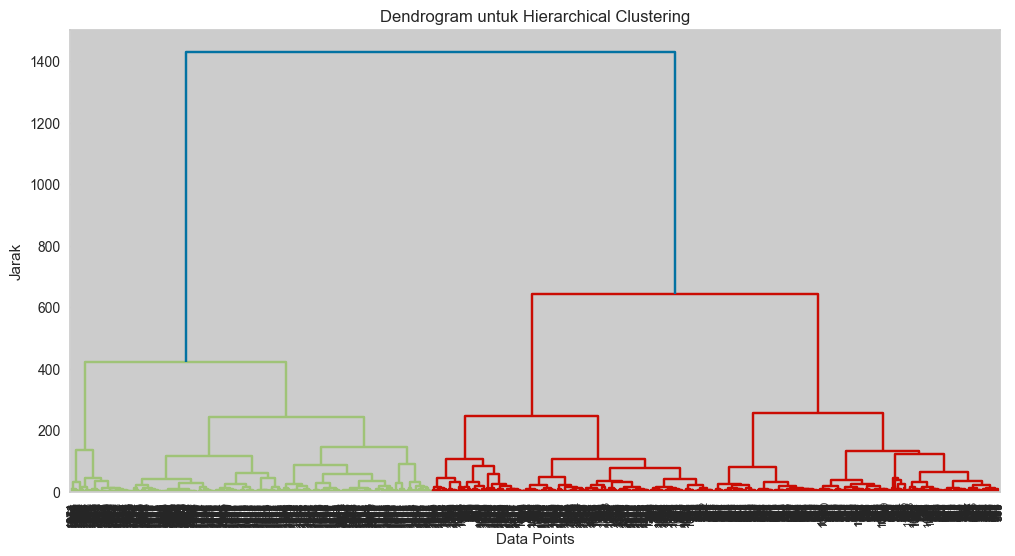

In [90]:
# Visualisasi dendrogram hasil hierarchical clustering menggunakan metode Ward
plt.figure(figsize=(12, 6))
linkage_matrix = linkage(df, method='ward')
dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrogram untuk Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Jarak")
plt.show()

In [91]:
# Membuat model Agglomerative Clustering dengan 4 cluster menggunakan metode linkage Ward
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward' )

# Melatih model pada data df
agg_clustering.fit(df)

# Mengambil label cluster hasil clustering
labels_hieararchial = agg_clustering.labels_

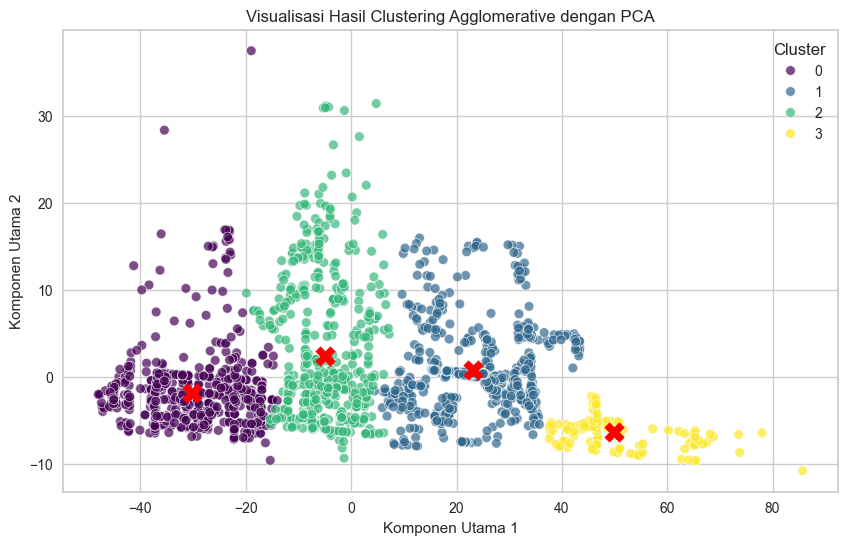

In [92]:
# Reduksi dimensi data menjadi 2 komponen utama menggunakan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Membuat DataFrame baru untuk visualisasi, dengan kolom PCA1, PCA2 dan label cluster
reduced_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
reduced_df['cluster'] = labels_hieararchial

# Membuat scatter plot hasil clustering pada dua komponen utama PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='cluster',
    palette='viridis', data=reduced_df, alpha=0.7
)

# Menghitung centroid tiap cluster di ruang PCA dan menandainya dengan tanda 'X' merah
centroids = reduced_df.groupby('cluster')[['PCA1', 'PCA2']].mean()
for cluster_id, centroid in centroids.iterrows():
    plt.scatter(centroid['PCA1'], centroid['PCA2'], color='red', s=200, marker='X')

plt.title(f'Visualisasi Hasil Clustering Agglomerative dengan PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.show()

### Evaluasi

Evaluasi Internal Hierarchical

In [93]:
# Menghitung dan menampilkan Silhouette Score untuk mengukur seberapa baik cluster terbentuk
sil_score = silhouette_score(df, labels_hieararchial)
print(f"Silhouette Score: {sil_score:.4f}")

# Menghitung dan menampilkan Davies-Bouldin Index yang mengukur rata-rata similarity antar cluster (semakin kecil semakin baik)
dbi = davies_bouldin_score(df, labels_hieararchial)
print(f"Davies-Bouldin Index: {dbi:.2f}")

# Menghitung dan menampilkan Calinski-Harabasz Index, yang mengukur rasio antara dispersion antar cluster dan dalam cluster (semakin besar semakin baik)
ch_index = calinski_harabasz_score(df, labels_hieararchial)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.4817
Davies-Bouldin Index: 0.65
Calinski-Harabasz Index: 4487.83


Evaluasi Eksternal Hierarchical

In [94]:
# Menghitung Purity untuk mengukur kesesuaian cluster dengan kelas asli (semakin mendekati 1 semakin baik)
purity = purity_score(kelas, labels_hieararchial)
print(f'Purity Hierarchical: {purity:.4}')

# Menghitung Rand Index, metrik untuk mengukur kesamaan antara hasil clustering dan label asli (nilai 0-1, semakin dekat 1 semakin baik)
ri = rand_score(kelas, labels_hieararchial)
print(f'Rand Index Hierarchical: {ri:.4}')

# Menghitung Adjusted Rand Index (ARI) yang memperbaiki Rand Index dengan memperhitungkan kemungkinan kebetulan (nilai -1 sampai 1, semakin tinggi semakin baik)
ari = adjusted_rand_score(kelas, labels_hieararchial)
print(f'Adjusted Rand Index Hierarchical: {ari:.4}')

# Menghitung Normalized Mutual Information (NMI), ukuran ketergantungan informasi antara cluster dan kelas asli (0-1, semakin tinggi semakin baik)
nmi = normalized_mutual_info_score(kelas, labels_hieararchial)
print(f'Normalized Mutual Informatiion Hierarchical: {nmi:.4}')

# Menghitung Fowlkes-Mallows Index, mengukur kesamaan antara cluster dan label asli (0-1, semakin tinggi semakin baik)
fm = fowlkes_mallows_score(kelas, labels_hieararchial)
print(f'Fowlkes-Mallows Index Hierarchical: {fm:.4}')

Purity Hierarchical: 0.4475
Rand Index Hierarchical: 0.7591
Adjusted Rand Index Hierarchical: 0.3187
Normalized Mutual Informatiion Hierarchical: 0.5055
Fowlkes-Mallows Index Hierarchical: 0.4796


## DBSCAN

### Modeling

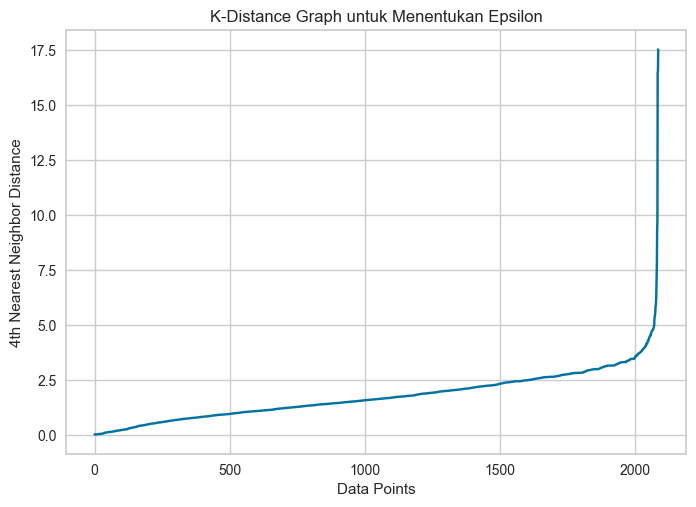

In [95]:
# grafik K-Distance untuk membantu menentukan nilai epsilon optimal pada DBSCAN
# dengan cara mengurutkan jarak ke tetangga ke-4 dari setiap titik data
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(df)
distances, indices = neigh.kneighbors(df)
distances = np.sort(distances[:, 4], axis=0)

plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("K-Distance Graph untuk Menentukan Epsilon")
plt.show()

In [96]:
# Melakukan clustering menggunakan DBSCAN dengan epsilon 3.85 dan minimum sampel 40
db = DBSCAN(eps=3.85, min_samples=40)
db.fit(df)

# Menandai core samples berdasarkan indeks dari DBSCAN
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Menyimpan label cluster hasil DBSCAN
labels_dbscan = db.labels_

['y', 'b', 'g', 'r']


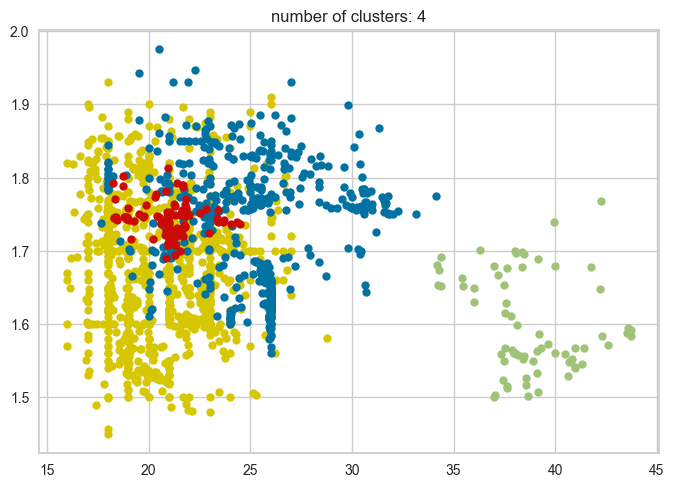

In [97]:
# Menghitung jumlah cluster (tidak termasuk noise yang berlabel -1)
n_clusters_ = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

# Mendapatkan label cluster unik
unique_labels = set(labels_dbscan)

# Warna untuk tiap cluster (warna hitam untuk noise)
colors = ['y', 'b', 'g', 'r']
print(colors)

# Visualisasi titik data berdasarkan cluster dan tipe titik (core atau bukan)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels_dbscan == k)
    xy = df[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

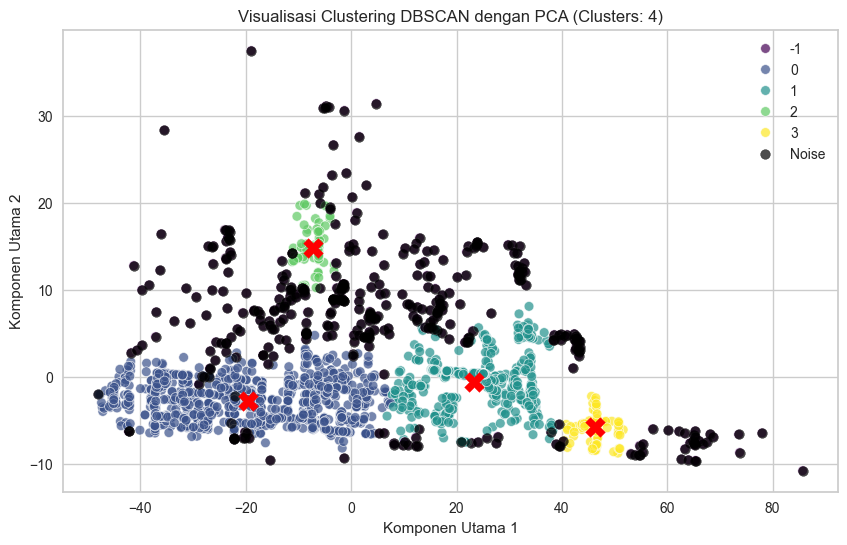

In [98]:
# Melakukan reduksi dimensi data menjadi 2 komponen utama menggunakan PCA
pca = PCA(n_components=2)

# Membuat DataFrame hasil PCA dan menambahkan label cluster dari DBSCAN
reduced_data = pca.fit_transform(df)
reduced_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
reduced_df['cluster'] = labels_dbscan

# Visualisasi scatter plot hasil clustering DBSCAN dalam ruang 2D PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='cluster',
    palette='viridis', data=reduced_df, alpha=0.7
)

# Menandai titik noise (label -1) dengan warna hitam
plt.scatter(
    reduced_df[reduced_df['cluster'] == -1]['PCA1'],
    reduced_df[reduced_df['cluster'] == -1]['PCA2'],
    color='black', label='Noise', alpha=0.7
)

# Menampilkan centroid setiap cluster (kecuali noise) dengan marker 'X' berwarna merah
for cluster_id in set(labels_dbscan):
    if cluster_id != -1:
        cluster_data = reduced_df[reduced_df['cluster'] == cluster_id]
        centroid = cluster_data[['PCA1', 'PCA2']].mean()
        plt.scatter(centroid['PCA1'], centroid['PCA2'], color='red', s=200, marker='X')

plt.title(f'Visualisasi Clustering DBSCAN dengan PCA (Clusters: {len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)})')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()
plt.show()

### Evaluasi

Evaluasi Internal DBSCAN

In [99]:
# Menghitung dan menampilkan Silhouette Score untuk mengukur seberapa baik cluster terbentuk
sil_score = silhouette_score(df, labels_dbscan)
print(f'Silhouette Score: {sil_score:.2f}')

# Menghitung dan menampilkan Davies-Bouldin Index yang mengukur rata-rata similarity antar cluster (semakin kecil semakin baik)
dbi = davies_bouldin_score(df, labels_dbscan)
print(f"Davies-Bouldin Index (DBSCAN): {dbi:.2f}")

# Menghitung dan menampilkan Calinski-Harabasz Index, yang mengukur rasio antara dispersion antar cluster dan dalam cluster (semakin besar semakin baik)
ch_index = calinski_harabasz_score(df, labels_dbscan)
print(f"Calinski-Harabasz Index (DBSCAN): {ch_index:.2f}")

Silhouette Score: 0.20
Davies-Bouldin Index (DBSCAN): 1.41
Calinski-Harabasz Index (DBSCAN): 856.84


Evaluasi Eksternal DBSCAN

In [100]:
# Menghitung Purity untuk mengukur kesesuaian cluster dengan kelas asli (semakin mendekati 1 semakin baik)
purity = purity_score(kelas, labels_dbscan)
print(f'Purity DBSCAN: {purity:.4}')

# Menghitung Rand Index, metrik untuk mengukur kesamaan antara hasil clustering dan label asli (nilai 0-1, semakin dekat 1 semakin baik)
ri = rand_score(kelas, labels_dbscan)
print(f'Rand Index DBSCAN: {ri:.4}')

# Menghitung Adjusted Rand Index (ARI) yang memperbaiki Rand Index dengan memperhitungkan kemungkinan kebetulan (nilai -1 sampai 1, semakin tinggi semakin baik)
ari = adjusted_rand_score(kelas, labels_dbscan)
print(f'Adjusted Rand Index DBSCAN: {ari:.4}')

# Menghitung Normalized Mutual Information (NMI), ukuran ketergantungan informasi antara cluster dan kelas asli (0-1, semakin tinggi semakin baik)
nmi = normalized_mutual_info_score(kelas, labels_dbscan)
print(f'Normalized Mutual Informatiion DBSCAN: {nmi:.4}')

# Menghitung Fowlkes-Mallows Index, mengukur kesamaan antara cluster dan label asli (0-1, semakin tinggi semakin baik)
fm = fowlkes_mallows_score(kelas, labels_dbscan)
print(f'Fowlkes-Mallows Index DBSCAN: {fm:.4}')

Purity DBSCAN: 0.345
Rand Index DBSCAN: 0.6858
Adjusted Rand Index DBSCAN: 0.1688
Normalized Mutual Informatiion DBSCAN: 0.3342
Fowlkes-Mallows Index DBSCAN: 0.3641
